# Visualize latent space

In [6]:
%load_ext autoreload
%autoreload 2

import torch
from model import LofiModel
from dataset import prepare_dataloaders
from config import *
from utils import visualize_latent_space
print(torch.__version__)
print(torch.version.cuda)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.7.1+cu118
11.8


In [7]:
model = LofiModel()
train_dataloader, val_dataloader = prepare_dataloaders()
print(model)

Loading dataset with sliding window...
Found 499 MIDI files.
Processing MIDI files and extracting segments...


Processing files: 100%|██████████| 499/499 [01:16<00:00,  6.52it/s]

Successfully extracted 39187 segments from 499 files.
Splitting dataset...
Dataset split into: Train=33308, Validation=5879
Finished preparing dataset.

LofiModel(
  (encoder): Encoder(
    (input_projection): Linear(in_features=128, out_features=64, bias=True)
    (lstm): LSTM(64, 128, num_layers=2, batch_first=True, bidirectional=True)
    (fc_mu): Linear(in_features=256, out_features=128, bias=True)
    (fc_logvar): Linear(in_features=256, out_features=128, bias=True)
  )
  (decoder): HierarchicalDecoder(
    (z_to_conductor_initial): Linear(in_features=128, out_features=512, bias=True)
    (conductor): LSTM(1, 128, num_layers=2, batch_first=True)
    (conductor_to_decoder_initial): Linear(in_features=128, out_features=512, bias=True)
    (decoder_rnn): LSTM(1, 128, num_layers=2, batch_first=True)
    (output_projection): Linear(in_features=128, out_features=384, bias=True)
  )
)



--- Visualising latent space for epoch: 150 ---


Encoding samples:   0%|          | 0/1041 [00:00<?, ?it/s]

Encoding samples: 100%|██████████| 1041/1041 [00:07<00:00, 135.56it/s]


Performing PCA on the latent space...
Saving plot to: visualizations\latent_space_epoch_150.png



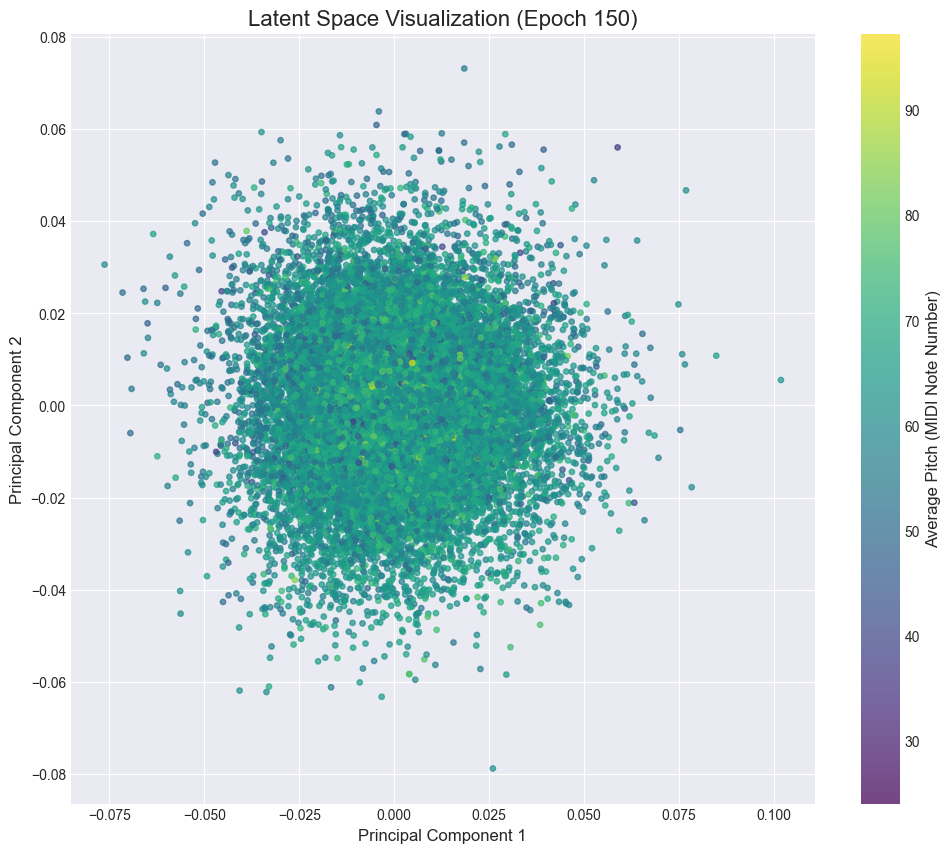

In [15]:
epochs = [150]
for epoch in epochs:
    visualize_latent_space(model, train_dataloader, epoch)
